In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.font_manager import FontProperties

# 獲取當前工作目錄
# 獲取當前工作目錄
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
version3_path = os.path.join(parent_dir, "Version3")

# 暫時將工作目錄切換到 Version3
os.chdir(version3_path)

from utils.model_score import *
import seaborn as sns
from matplotlib.font_manager import FontProperties
import pickle

try:
    myfont = FontProperties(fname=r"/System/Library/Fonts/PingFang.ttc")
    sns.set(style="whitegrid", font=myfont.get_name())
except Exception as e:
    print(e)
    
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

[Errno 2] No such file or directory: 'C:\\System\\Library\\Fonts\\PingFang.ttc'


In [2]:
# Define file paths and variable names for logistic models
logistic_file_paths = [
    "../Models/ModelPerformance/logistic/pass_out_overlap.pkl",
    "../Models/ModelPerformance/logistic/pass_0.pkl",
    "../Models/ModelPerformance/logistic/pass_1.pkl",
    "../Models/ModelPerformance/logistic/car_out_overlap.pkl",
    "../Models/ModelPerformance/logistic/car_0.pkl",
    "../Models/ModelPerformance/logistic/car_1.pkl",
    "../Models/ModelPerformance/logistic/motor_out_overlap.pkl",
    "../Models/ModelPerformance/logistic/motor_0.pkl",
    "../Models/ModelPerformance/logistic/motor_1.pkl",
    "../Models/ModelPerformance/logistic/full_data.pkl"
]

logistic_small_file_paths = [
    "../Models/ModelPerformance/logistic/子類別_pass_out_overlap.pkl",
    "../Models/ModelPerformance/logistic/子類別_pass_0.pkl",
    "../Models/ModelPerformance/logistic/子類別_pass_1.pkl",
    "../Models/ModelPerformance/logistic/子類別_car_out_overlap.pkl",
    "../Models/ModelPerformance/logistic/子類別_car_0.pkl",
    "../Models/ModelPerformance/logistic/子類別_car_1.pkl",
    "../Models/ModelPerformance/logistic/子類別_motor_out_overlap.pkl",
    "../Models/ModelPerformance/logistic/子類別_motor_0.pkl",
    "../Models/ModelPerformance/logistic/子類別_motor_1.pkl",
    "../Models/ModelPerformance/logistic/子類別_full_data.pkl"
]

# Define file paths and variable names for svc models
svc_file_paths = [
    "../Models/ModelPerformance/svc/pass_out_overlap.pkl",
    "../Models/ModelPerformance/svc/pass_0.pkl",
    "../Models/ModelPerformance/svc/pass_1.pkl",
    "../Models/ModelPerformance/svc/car_out_overlap.pkl",
    "../Models/ModelPerformance/svc/car_0.pkl",
    "../Models/ModelPerformance/svc/car_1.pkl",
    "../Models/ModelPerformance/svc/motor_out_overlap.pkl",
    "../Models/ModelPerformance/svc/motor_0.pkl",
    "../Models/ModelPerformance/svc/motor_1.pkl",
    "../Models/ModelPerformance/svc/full_data.pkl"
]

svc_small_file_paths = [
    "../Models/ModelPerformance/svc/子類別_pass_out_overlap.pkl",
    "../Models/ModelPerformance/svc/子類別_pass_0.pkl",
    "../Models/ModelPerformance/svc/子類別_pass_1.pkl",
    "../Models/ModelPerformance/svc/子類別_car_out_overlap.pkl",
    "../Models/ModelPerformance/svc/子類別_car_0.pkl",
    "../Models/ModelPerformance/svc/子類別_car_1.pkl",
    "../Models/ModelPerformance/svc/子類別_motor_out_overlap.pkl",
    "../Models/ModelPerformance/svc/子類別_motor_0.pkl",
    "../Models/ModelPerformance/svc/子類別_motor_1.pkl",
    "../Models/ModelPerformance/svc/子類別_full_data.pkl"
]

variable_names = [
    "pass_out_overlap", "pass_0", "pass_1",
    "car_out_overlap", "car_0", "car_1",
    "motor_out_overlap", "motor_0", "motor_1",
    "full_data"
]

# Function to load pickle files
def load_pickle_files(file_paths, variable_names):
    data = {}
    for file_path, var_name in zip(file_paths, variable_names):
        with open(file_path, "rb") as f:
            data[var_name] = pickle.load(f)
    return data

## 大類別

In [3]:
# Load logistic and svc models
logistic_data = load_pickle_files(logistic_file_paths, variable_names)
svc_data = load_pickle_files(svc_file_paths, variable_names)

# Process logistic data
poo_mtrx, poo_recall, poo_class, poo_threshold = get_score(
    logistic_data['pass_out_overlap']['y'], logistic_data['pass_out_overlap']['decision_scores'])
p0_mtrx, p0_recall, p_class, p0_threshold = get_score(
    logistic_data['pass_0']['y'], logistic_data['pass_0']['decision_scores'])
p1_mtrx, p1_recall, p_class, p1_threshold = get_score(
    logistic_data['pass_1']['y'], logistic_data['pass_1']['decision_scores'])

moo_mtrx, moo_recall, moo_class, moo_threshold = get_score(
    logistic_data['motor_out_overlap']['y'], logistic_data['motor_out_overlap']['decision_scores'])
m0_mtrx, m0_recall, m_class, m0_threshold = get_score(
    logistic_data['motor_0']['y'], logistic_data['motor_0']['decision_scores'])
m1_mtrx, m1_recall, m_class, m1_threshold = get_score(
    logistic_data['motor_1']['y'], logistic_data['motor_1']['decision_scores'])

coo_mtrx, coo_recall, coo_class, coo_threshold = get_score(
    logistic_data['car_out_overlap']['y'], logistic_data['car_out_overlap']['decision_scores'])
c0_mtrx, c0_recall, c_class, c0_threshold = get_score(
    logistic_data['car_0']['y'], logistic_data['car_0']['decision_scores'])
c1_mtrx, c1_recall, c_class, c1_threshold = get_score(
    logistic_data['car_1']['y'], logistic_data['car_1']['decision_scores'])

fd_mtrx, fd_recall, fd_class, fd_threshold = get_score(
    logistic_data['full_data']['y'], logistic_data['full_data']['decision_scores'])

# Process svc data
poo_mtrx_svc, poo_recall_svc, poo_class_svc, poo_threshold_svc = get_score(
    svc_data['pass_out_overlap']['y'], svc_data['pass_out_overlap']['decision_scores'])
p0_mtrx_svc, p0_recall_svc, p_class_svc, p0_threshold_svc = get_score(
    svc_data['pass_0']['y'], svc_data['pass_0']['decision_scores'])
p1_mtrx_svc, p1_recall_svc, p_class_svc, p1_threshold_svc = get_score(
    svc_data['pass_1']['y'], svc_data['pass_1']['decision_scores'])

moo_mtrx_svc, moo_recall_svc, moo_class_svc, moo_threshold_svc = get_score(
    svc_data['motor_out_overlap']['y'], svc_data['motor_out_overlap']['decision_scores'])
m0_mtrx_svc, m0_recall_svc, m_class_svc, m0_threshold_svc = get_score(
    svc_data['motor_0']['y'], svc_data['motor_0']['decision_scores'])
m1_mtrx_svc, m1_recall_svc, m_class_svc, m1_threshold_svc = get_score(
    svc_data['motor_1']['y'], svc_data['motor_1']['decision_scores'])

coo_mtrx_svc, coo_recall_svc, coo_class_svc, coo_threshold_svc = get_score(
    svc_data['car_out_overlap']['y'], svc_data['car_out_overlap']['decision_scores'])
c0_mtrx_svc, c0_recall_svc, c_class_svc, c0_threshold_svc = get_score(
    svc_data['car_0']['y'], svc_data['car_0']['decision_scores'])
c1_mtrx_svc, c1_recall_svc, c_class_svc, c1_threshold_svc = get_score(
    svc_data['car_1']['y'], svc_data['car_1']['decision_scores'])

fd_mtrx_svc, fd_recall_svc, fd_class_svc, fd_threshold_svc = get_score(
    svc_data['full_data']['y'], svc_data['full_data']['decision_scores'])

# 子類別

In [6]:
logistic_small_data = load_pickle_files(logistic_small_file_paths, variable_names)
# svc_small_data = load_pickle_files(svc_small_file_paths, variable_names)

# Process logistic data
poo_mtrx_small, poo_recall_small, poo_class_small, poo_threshold_small = get_score(
    logistic_small_data['pass_out_overlap']['y'], logistic_small_data['pass_out_overlap']['decision_scores'])
p0_mtrx_small, p0_recall_small, p_class_small, p0_threshold_small = get_score(
    logistic_small_data['pass_0']['y'], logistic_small_data['pass_0']['decision_scores'])
p1_mtrx_small, p1_recall_small, p_class_small, p1_threshold_small = get_score(
    logistic_small_data['pass_1']['y'], logistic_small_data['pass_1']['decision_scores'])

moo_mtrx_small, moo_recall_small, moo_class_small, moo_threshold_small = get_score(
    logistic_small_data['motor_out_overlap']['y'], logistic_small_data['motor_out_overlap']['decision_scores'])
m0_mtrx_small, m0_recall_small, m_class_small, m0_threshold_small = get_score(
    logistic_small_data['motor_0']['y'], logistic_small_data['motor_0']['decision_scores'])
m1_mtrx_small, m1_recall_small, m_class_small, m1_threshold_small = get_score(
    logistic_small_data['motor_1']['y'], logistic_small_data['motor_1']['decision_scores'])

coo_mtrx_small, coo_recall_small, coo_class_small, coo_threshold_small = get_score(
    logistic_small_data['car_out_overlap']['y'], logistic_small_data['car_out_overlap']['decision_scores'])
c0_mtrx_small, c0_recall_small, c_class_small, c0_threshold_small = get_score(
    logistic_small_data['car_0']['y'], logistic_small_data['car_0']['decision_scores'])
c1_mtrx_small, c1_recall_small, c_class_small, c1_threshold_small = get_score(
    logistic_small_data['car_1']['y'], logistic_small_data['car_1']['decision_scores'])

fd_mtrx_small, fd_recall_small, fd_class_small, fd_threshold_small = get_score(
    logistic_small_data['full_data']['y'], logistic_small_data['full_data']['decision_scores'])

# # Process svc data
# poo_mtrx_small_svc, poo_recall_small_svc, poo_class_small_svc, poo_threshold_small_svc = get_score(
#     svc_small_data['pass_out_overlap']['y'], svc_small_data['pass_out_overlap']['decision_scores'])
# p0_mtrx_small_svc, p0_recall_small_svc, p_class_small_svc, p0_threshold_small_svc = get_score(
#     svc_small_data['pass_0']['y'], svc_small_data['pass_0']['decision_scores'])
# p1_mtrx_small_svc, p1_recall_small_svc, p_class_small_svc, p1_threshold_small_svc = get_score(
#     svc_small_data['pass_1']['y'], svc_small_data['pass_1']['decision_scores'])

# moo_mtrx_small_svc, moo_recall_small_svc, moo_class_small_svc, moo_threshold_small_svc = get_score(
#     svc_small_data['motor_out_overlap']['y'], svc_small_data['motor_out_overlap']['decision_scores'])
# m0_mtrx_small_svc, m0_recall_small_svc, m_class_small_svc, m0_threshold_small_svc = get_score(
#     svc_small_data['motor_0']['y'], svc_small_data['motor_0']['decision_scores'])
# m1_mtrx_small_svc, m1_recall_small_svc, m_class_small_svc, m1_threshold_small_svc = get_score(
#     svc_small_data['motor_1']['y'], svc_small_data['motor_1']['decision_scores'])

# coo_mtrx_small_svc, coo_recall_small_svc, coo_class_small_svc, coo_threshold_small_svc = get_score(
#     svc_small_data['car_out_overlap']['y'], svc_small_data['car_out_overlap']['decision_scores'])
# c0_mtrx_small_svc, c0_recall_small_svc, c_class_small_svc, c0_threshold_small_svc = get_score(
#     svc_small_data['car_0']['y'], svc_small_data['car_0']['decision_scores'])
# c1_mtrx_small_svc, c1_recall_small_svc, c_class_small_svc, c1_threshold_small_svc = get_score(
#     svc_small_data['car_1']['y'], svc_small_data['car_1']['decision_scores'])

# fd_mtrx_small_svc, fd_recall_small_svc, fd_class_small_svc, fd_threshold_small_svc = get_score(
#     svc_small_data['full_data']['y'], svc_small_data['full_data']['decision_scores'])

In [8]:
# Logistic model recall calculations
recall_top_log_f = fd_mtrx[0, 0] / (fd_mtrx[0, 0] + fd_mtrx[0, 1])
recall_bottom_log_f = fd_mtrx[1, 1] / (fd_mtrx[1, 1] + fd_mtrx[1, 0])

print('Logistic Model - Full version')
print(f"Top recall: {recall_top_log_f:.4f}")
print(f"Bottom recall: {recall_bottom_log_f:.4f}")

mapper_log = poo_mtrx + moo_mtrx + coo_mtrx + p0_mtrx + m0_mtrx + c0_mtrx + p1_mtrx + m1_mtrx + c1_mtrx 

recall_top_log_m = mapper_log[0, 0] / (mapper_log[0, 0] + mapper_log[0, 1])
recall_bottom_log_m = mapper_log[1, 1] / (mapper_log[1, 1] + mapper_log[1, 0])

print('Logistic Model - Topology version')
print(f"Top recall: {recall_top_log_m:.4f}")
print(f"Bottom recall: {recall_bottom_log_m:.4f}")

# SVC model recall calculations
recall_top_svc_f = fd_mtrx_svc[0, 0] / (fd_mtrx_svc[0, 0] + fd_mtrx_svc[0, 1])
recall_bottom_svc_f = fd_mtrx_svc[1, 1] / (fd_mtrx_svc[1, 1] + fd_mtrx_svc[1, 0])

print('SVC Model - Full version')
print(f"Top recall: {recall_top_svc_f:.4f}")
print(f"Bottom recall: {recall_bottom_svc_f:.4f}")

mapper_svc = poo_mtrx_svc + moo_mtrx_svc + coo_mtrx_svc + p0_mtrx_svc + m0_mtrx_svc + c0_mtrx_svc + p1_mtrx_svc + m1_mtrx_svc + c1_mtrx_svc 

recall_top_svc_m = mapper_svc[0, 0] / (mapper_svc[0, 0] + mapper_svc[0, 1])
recall_bottom_svc_m = mapper_svc[1, 1] / (mapper_svc[1, 1] + mapper_svc[1, 0])

print('SVC Model - Topology version')
print(f"Top recall: {recall_top_svc_m:.4f}")
print(f"Bottom recall: {recall_bottom_svc_m:.4f}")

recall_top_log_f_small = fd_mtrx_small[0, 0] / (fd_mtrx_small[0, 0] + fd_mtrx_small[0, 1])
recall_bottom_log_f_small = fd_mtrx_small[1, 1] / (fd_mtrx_small[1, 1] + fd_mtrx_small[1, 0])

print('Logistic Model - Full version - Small')
print(f"Top recall: {recall_top_log_f_small:.4f}")
print(f"Bottom recall: {recall_bottom_log_f_small:.4f}")

mapper_log_small = poo_mtrx_small + moo_mtrx_small + coo_mtrx_small + p0_mtrx_small + m0_mtrx_small + c0_mtrx_small + p1_mtrx_small + m1_mtrx_small + c1_mtrx_small

recall_top_log_m_small = mapper_log_small[0, 0] / (mapper_log_small[0, 0] + mapper_log_small[0, 1])
recall_bottom_log_m_small = mapper_log_small[1, 1] / (mapper_log_small[1, 1] + mapper_log_small[1, 0])

print('Logistic Model - Topology version - Small')
print(f"Top recall: {recall_top_log_m_small:.4f}")
print(f"Bottom recall: {recall_bottom_log_m_small:.4f}")

# recall_top_svc_f_small = fd_mtrx_svc[0, 0] / (fd_mtrx_svc[0, 0] + fd_mtrx_svc[0, 1])
# recall_bottom_svc_f_small = fd_mtrx_svc[1, 1] / (fd_mtrx_svc[1, 1] + fd_mtrx_svc[1, 0])

# print('SVC Model - Full version - Small')
# print(f"Top recall: {recall_top_svc_f_small:.4f}")
# print(f"Bottom recall: {recall_bottom_svc_f_small:.4f}")

# mapper_svc_small = poo_mtrx_small + moo_mtrx_small + coo_mtrx_small + p0_mtrx_small + m0_mtrx_small + c0_mtrx_small + p1_mtrx_small + m1_mtrx_small + c1_mtrx_small

# recall_top_svc_m_small = mapper_svc_small[0, 0] / (mapper_svc_small[0, 0] + mapper_svc_small[0, 1])
# recall_bottom_svc_m_small = mapper_svc_small[1, 1] / (mapper_svc_small[1, 1] + mapper_svc_small[1, 0])

# print('SVC Model - Topology version - Small')
# print(f"Top recall: {recall_top_svc_m_small:.4f}")
# print(f"Bottom recall: {recall_bottom_svc_m_small:.4f}")

Logistic Model - Full version
Top recall: 0.7708
Bottom recall: 0.6814
Logistic Model - Topology version
Top recall: 0.7741
Bottom recall: 0.6353
SVC Model - Full version
Top recall: 0.7400
Bottom recall: 0.7237
SVC Model - Topology version
Top recall: 0.7587
Bottom recall: 0.6485
Logistic Model - Full version - Small
Top recall: 0.7817
Bottom recall: 0.7030
Logistic Model - Topology version - Small
Top recall: 0.7807
Bottom recall: 0.6184


## 大類別準確率

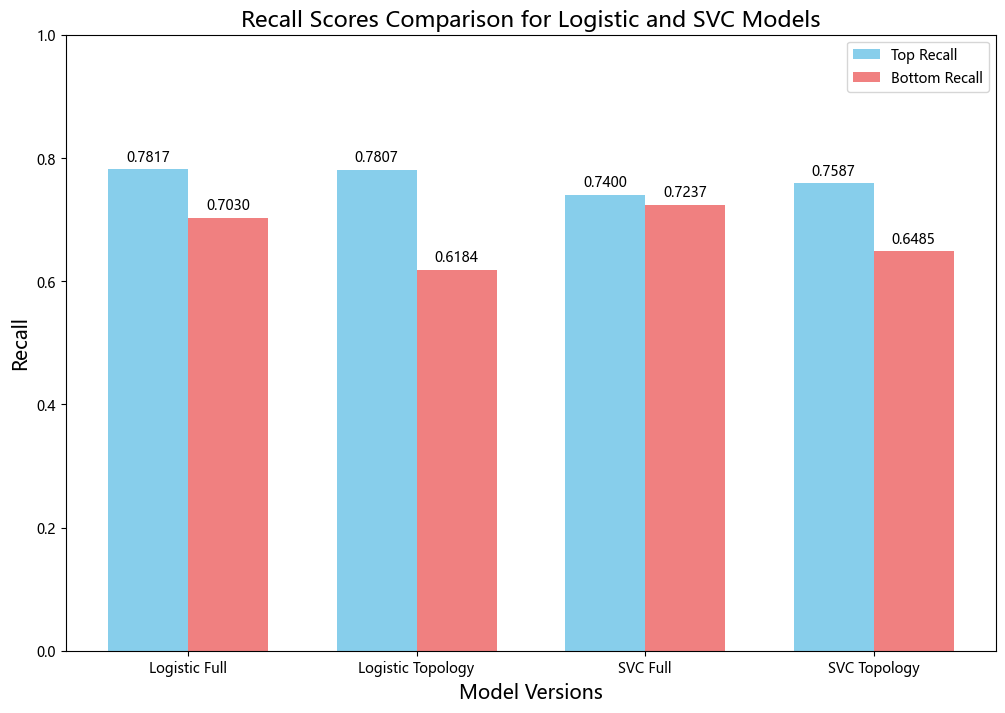

In [67]:
# Data for plotting
labels = ['Logistic Full', 'Logistic Topology', 'SVC Full', 'SVC Topology']
top_recalls = [recall_top_log_f, recall_top_log_m, recall_top_svc_f, recall_top_svc_m]
bottom_recalls = [recall_bottom_log_f, recall_bottom_log_m, recall_bottom_svc_f, recall_bottom_svc_m]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
bars1 = ax.bar(x - width/2, top_recalls, width, label='Top Recall', color='skyblue')
bars2 = ax.bar(x + width/2, bottom_recalls, width, label='Bottom Recall', color='lightcoral')

# Add labels on top of each bar
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add title and labels
ax.set_title('Recall Scores Comparison for Logistic and SVC Models', fontsize=16)
ax.set_xlabel('Model Versions', fontsize=14)
ax.set_ylabel('Recall', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)  # Ensure the y-axis starts at 0 and ends at 1
ax.legend()

# Show the plot
plt.show()

## Recall

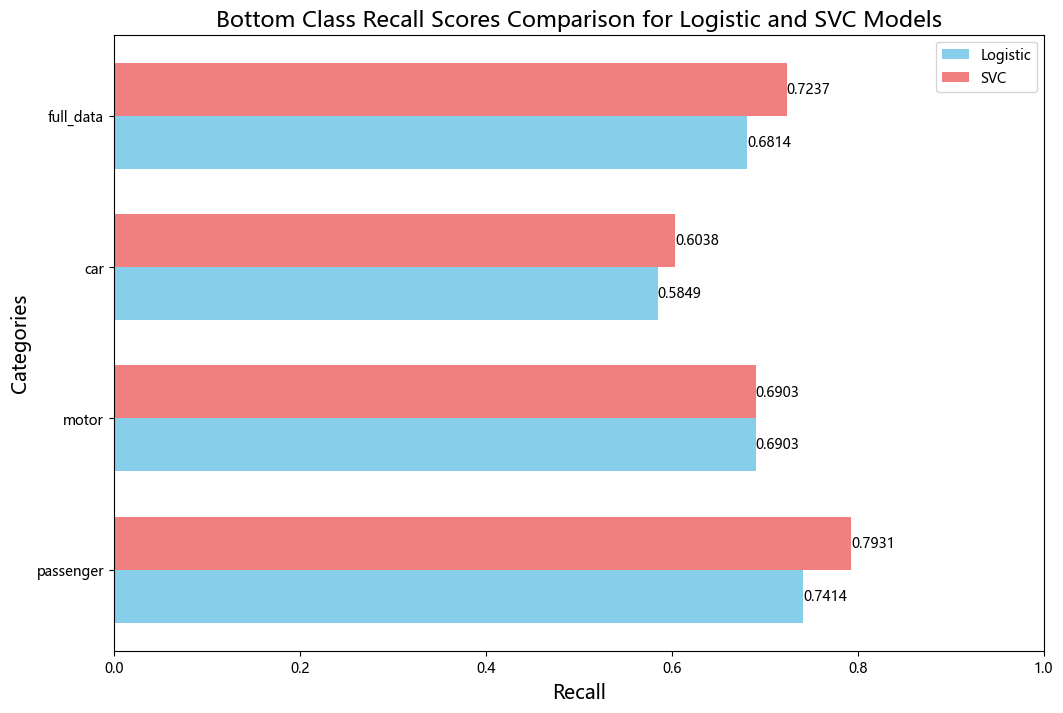

In [25]:
# Calculate recall for the bottom class
def calculate_bottom_recall(matrix):
    return matrix[1, 1] / (matrix[1, 1] + matrix[1, 0])
    # true_positives = matrix[0, 0]
    # true_negatives = matrix[1, 1]
    # total_samples = np.sum(matrix)

    # accuracy = (true_positives + true_negatives) / total_samples
    # return accuracy

# Sum matrices for logistic models
passenger_log_mtrx = poo_mtrx + p0_mtrx + p1_mtrx
motor_log_mtrx = moo_mtrx + m0_mtrx + m1_mtrx
car_log_mtrx = coo_mtrx + c0_mtrx + c1_mtrx

# Sum matrices for svc models
passenger_svc_mtrx = poo_mtrx_svc + p0_mtrx_svc + p1_mtrx_svc
motor_svc_mtrx = moo_mtrx_svc + m0_mtrx_svc + m1_mtrx_svc
car_svc_mtrx = coo_mtrx_svc + c0_mtrx_svc + c1_mtrx_svc

# Calculate recalls for logistic models
passenger_log_recall = calculate_bottom_recall(passenger_log_mtrx)
motor_log_recall = calculate_bottom_recall(motor_log_mtrx)
car_log_recall = calculate_bottom_recall(car_log_mtrx)
fd_log_recall = calculate_bottom_recall(fd_mtrx)

# Calculate recalls for svc models
passenger_svc_recall = calculate_bottom_recall(passenger_svc_mtrx)
motor_svc_recall = calculate_bottom_recall(motor_svc_mtrx)
car_svc_recall = calculate_bottom_recall(car_svc_mtrx)
fd_svc_recall = calculate_bottom_recall(fd_mtrx_svc)

recalls_logistic = [passenger_log_recall, motor_log_recall, car_log_recall, fd_log_recall]
recalls_svc = [passenger_svc_recall, motor_svc_recall, car_svc_recall, fd_svc_recall]
names = ['passenger', 'motor', 'car', 'full_data']

# Create the combined bar chart
x = np.arange(len(names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
bars1 = ax.barh(x - width/2, recalls_logistic, width, label='Logistic', color='skyblue')
bars2 = ax.barh(x + width/2, recalls_svc, width, label='SVC', color='lightcoral')

# Add labels on top of each bar
for bars in [bars1, bars2]:
    for bar in bars:
        xval = bar.get_width()
        plt.text(xval, bar.get_y() + bar.get_height()/2.0, f'{xval:.4f}', ha='left', va='center')

# Add title and labels
ax.set_title('Bottom Class Recall Scores Comparison for Logistic and SVC Models', fontsize=16)
ax.set_xlabel('Recall', fontsize=14)
ax.set_ylabel('Categories', fontsize=14)
ax.set_yticks(x)
ax.set_yticklabels(names)
ax.set_xlim(0, 1)  # Ensure the x-axis starts at 0 and ends at 1
ax.legend()

# Show the plot
plt.show()

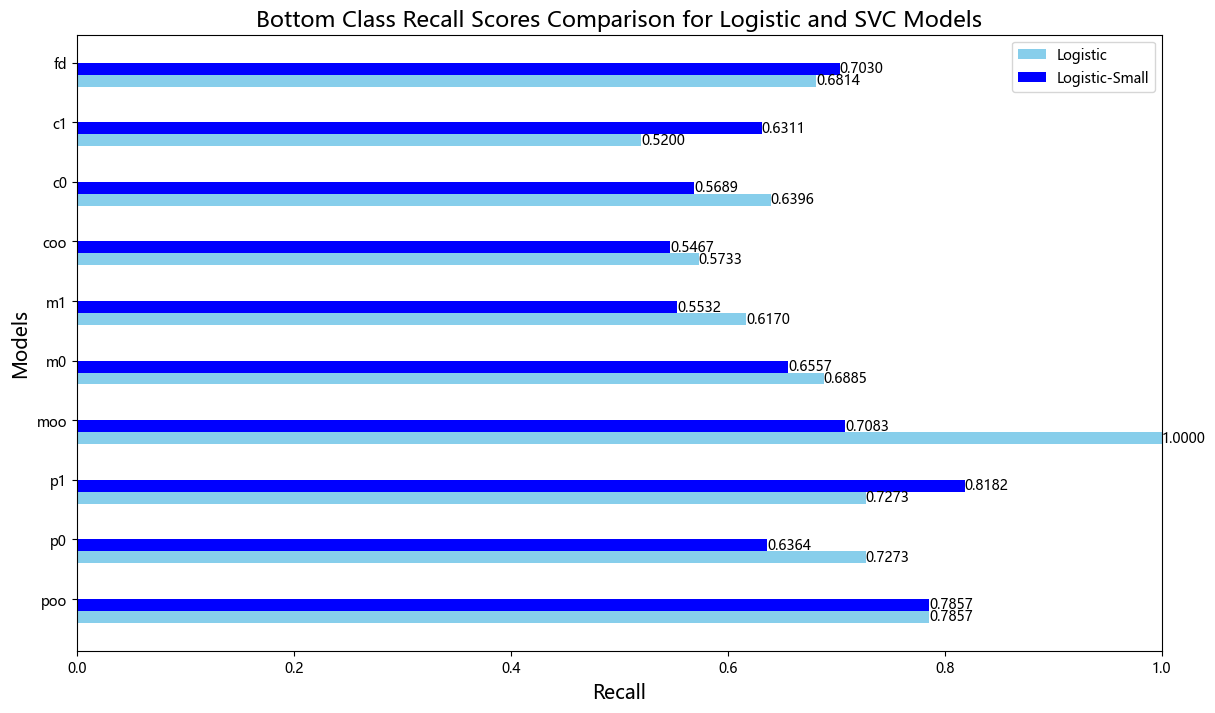

In [10]:
# Calculate recall for the bottom class
def calculate_bottom_recall(matrix):
    return matrix[1, 1] / (matrix[1, 1] + matrix[1, 0])

# Calculate recalls for logistic models
poo_log_recall = calculate_bottom_recall(poo_mtrx)
p0_log_recall = calculate_bottom_recall(p0_mtrx)
p1_log_recall = calculate_bottom_recall(p1_mtrx)
moo_log_recall = calculate_bottom_recall(moo_mtrx)
m0_log_recall = calculate_bottom_recall(m0_mtrx)
m1_log_recall = calculate_bottom_recall(m1_mtrx)
coo_log_recall = calculate_bottom_recall(coo_mtrx)
c0_log_recall = calculate_bottom_recall(c0_mtrx)
c1_log_recall = calculate_bottom_recall(c1_mtrx)
fd_log_recall = calculate_bottom_recall(fd_mtrx)

# Calculate recalls for svc models
poo_svc_recall = calculate_bottom_recall(poo_mtrx_svc)
p0_svc_recall = calculate_bottom_recall(p0_mtrx_svc)
p1_svc_recall = calculate_bottom_recall(p1_mtrx_svc)
moo_svc_recall = calculate_bottom_recall(moo_mtrx_svc)
m0_svc_recall = calculate_bottom_recall(m0_mtrx_svc)
m1_svc_recall = calculate_bottom_recall(m1_mtrx_svc)
coo_svc_recall = calculate_bottom_recall(coo_mtrx_svc)
c0_svc_recall = calculate_bottom_recall(c0_mtrx_svc)
c1_svc_recall = calculate_bottom_recall(c1_mtrx_svc)
fd_svc_recall = calculate_bottom_recall(fd_mtrx_svc)

# Calculate recalls for logistic-small models
poo_log_recall_small = calculate_bottom_recall(poo_mtrx_small)
p0_log_recall_small = calculate_bottom_recall(p0_mtrx_small)
p1_log_recall_small = calculate_bottom_recall(p1_mtrx_small)
moo_log_recall_small = calculate_bottom_recall(moo_mtrx_small)
m0_log_recall_small = calculate_bottom_recall(m0_mtrx_small)
m1_log_recall_small = calculate_bottom_recall(m1_mtrx_small)
coo_log_recall_small = calculate_bottom_recall(coo_mtrx_small)
c0_log_recall_small = calculate_bottom_recall(c0_mtrx_small)
c1_log_recall_small = calculate_bottom_recall(c1_mtrx_small)
fd_log_recall_small = calculate_bottom_recall(fd_mtrx_small)

# Calculate recalls for svc-small models
# poo_svc_recall_small = calculate_bottom_recall(poo_mtrx_svc_small)
# p0_svc_recall_small = calculate_bottom_recall(p0_mtrx_svc_small)
# p1_svc_recall_small = calculate_bottom_recall(p1_mtrx_svc_small)
# moo_svc_recall_small = calculate_bottom_recall(moo_mtrx_svc_small)
# m0_svc_recall_small = calculate_bottom_recall(m0_mtrx_svc_small)
# m1_svc_recall_small = calculate_bottom_recall(m1_mtrx_svc_small)
# coo_svc_recall_small = calculate_bottom_recall(coo_mtrx_svc_small)
# c0_svc_recall_small = calculate_bottom_recall(c0_mtrx_svc_small)
# c1_svc_recall_small = calculate_bottom_recall(c1_mtrx_svc_small)
# fd_svc_recall_small = calculate_bottom_recall(fd_mtrx_svc_small)

# Combine recalls for plotting
recalls_logistic = [poo_log_recall, p0_log_recall, p1_log_recall, moo_log_recall, m0_log_recall, m1_log_recall, coo_log_recall, c0_log_recall, c1_log_recall, fd_log_recall]
recalls_logistic_small = [poo_log_recall_small, p0_log_recall_small, p1_log_recall_small, moo_log_recall_small, m0_log_recall_small, m1_log_recall_small, coo_log_recall_small, c0_log_recall_small, c1_log_recall_small, fd_log_recall_small]
# recalls_svc = [poo_svc_recall, p0_svc_recall, p1_svc_recall, moo_svc_recall, m0_svc_recall, m1_svc_recall, coo_svc_recall, c0_svc_recall, c1_svc_recall, fd_svc_recall]
# recalls_svc_small = [poo_svc_recall_small, p0_svc_recall_small, p1_svc_recall_small, moo_svc_recall_small, m0_svc_recall_small, m1_svc_recall_small, coo_svc_recall_small, c0_svc_recall_small, c1_svc_recall_small, fd_svc_recall_small]
names = ['poo', 'p0', 'p1', 'moo', 'm0', 'm1', 'coo', 'c0', 'c1', 'fd']

# Create the combined bar chart
x = np.arange(len(names))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
bars1 = ax.barh(x - 1.5*width, recalls_logistic, width, label='Logistic', color='skyblue')
bars2 = ax.barh(x - 0.5*width, recalls_logistic_small, width, label='Logistic-Small', color='blue')
# bars3 = ax.barh(x + 0.5*width, recalls_svc, width, label='SVC', color='lightcoral')
# bars4 = ax.barh(x + 1.5*width, recalls_svc_small, width, label='SVC-Small', color='red')

# Add labels on top of each bar
for bars in [bars1, bars2]:
    for bar in bars:
        xval = bar.get_width()
        plt.text(xval, bar.get_y() + bar.get_height()/2.0, f'{xval:.4f}', ha='left', va='center')

# Add title and labels
ax.set_title('Bottom Class Recall Scores Comparison for Logistic and SVC Models', fontsize=16)
ax.set_xlabel('Recall', fontsize=14)
ax.set_ylabel('Models', fontsize=14)
ax.set_yticks(x)
ax.set_yticklabels(names)
ax.set_xlim(0, 1)  # Ensure the x-axis starts at 0 and ends at 1
ax.legend()

# Show the plot
plt.show()

In [20]:
c1_mtrx_small + c0_mtrx + coo_mtrx + moo_mtrx + m0_mtrx + m1_mtrx + p0_mtrx + p1_mtrx_small + poo_mtrx

array([[166517,  55149],
       [   360,    704]], dtype=int64)

In [22]:
fd_mtrx_small

array([[173278,  48388],
       [   316,    748]], dtype=int64)